Preparing models for 2 different approaches: tree models and neural networks.
Can bring in the latter after forming some initial hypotheses about how samples are clustered.

Input Data Files:
in calcofi-ncog-amplicon/01_out_files/
- 18Sv4 and 18Sv9 asv counts
- taxo_mft dictionaries, just in case?
- File of "ASV occurrence delta" between "nearshore" and "farshore" (clustering of ASVs on the basis of their sample occurrences, "particular clusters" (same ASV may fall into different clusters?) identified as nearshore or farshore based on their proportions witin samples.).
    - "Community clusters identified by SOMs have been subsequently labeled as “nearshore” or “offshore” based upon whether they were found more frequently in nearshore or offshore stations (weighted centroid). "
    - "The ASVs that show the greatest differential abundance (>99th percentile) between nearshore and offshore clusters are provided in Supplementary Data 1."
    - but it should be winner take all... yes, so each ASV gets a representation within the SOM...
in calcofi-ncog-amplicon/input_data_files/
- pr2 taxonomy which also integrates the Mixoplankton Database (Mitra et al 2023)
- Mixoplankton Database (has some unique species not annotated in PR2, vice versa)

outputs of this notebook: (can expand this to the water mass SOM clusters in the later paper)
- some indication of whether all, most, or very few mixos have a large ASV delta? permutation test? assumption of beta distribution? ratio statistic of some kind? could do a welch test but if statistic's sampling distribution isn't actually equal to the t distribution then that'd be misleading... unless there's a way to keep the permutation test concept and calculate a statistic that accounts for unequal variances or sample sizes.
- test of whether mixos in general (or CMs in particular) are differently distributed than non-mixos, or a specific group like diatoms? test of whether any particular mixos are outliers, (but outliers are evaluated with respect to their effect on a model, are meaningless without the concept of a model...)

### **Reading in input files**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#any functions required by other notebooks have been moved here
#reimport when changing functions
from helper_functions import identify_mixo_by_taxo 

In [6]:
identify_mixo_by_taxo(pd.Series(["Tripos_tenuis"]), match_by_genus=True, threshold = 1),\
identify_mixo_by_taxo(pd.Series(["Tripos_tenuis"]), match_by_genus=True, threshold = 5),\
identify_mixo_by_taxo(pd.Series(["Tripos_tenuis"]), match_by_genus=False)

(0    CM
 dtype: object,
 0    CM
 dtype: object,
 0    
 dtype: object)

In [7]:
#difference in mean ASV proportion between near and farshore SOM clusters (segmentation of samples over ASV frequencies)
asv_delta_ASVSOM = pd.read_csv("input_data_files/jamesetal2022_ASVdelta_betweenASVclusters.csv", index_col = 0)

### List of mixo names (most specific names, match these against last term of each classification)

In [13]:
asv_delta_ASVSOM["Taxonomy"] = asv_delta_ASVSOM["Taxonomy"].str.strip(";.")
asv_delta_ASVSOM["most_specific_name"] = asv_delta_ASVSOM["Taxonomy"].apply(lambda x: x.split(";")[-1].strip())
asv_delta_ASVSOM["MFT_loose"] = identify_mixo_by_taxo(
    asv_delta_ASVSOM["most_specific_name"], match_by_genus=True, threshold=5
)
asv_delta_ASVSOM["MFT_strict"] = identify_mixo_by_taxo(
    asv_delta_ASVSOM["most_specific_name"], match_by_genus=False
)
asv_delta_ASVSOM.loc[asv_delta_ASVSOM["MFT_loose"] != ""].index.size,\
asv_delta_ASVSOM.loc[asv_delta_ASVSOM["MFT_strict"] != ""].index.size

(45, 18)

In [18]:
#assert MFT_strict is a subset of MFT_loose
assert(
    asv_delta_ASVSOM.loc[asv_delta_ASVSOM["MFT_loose"] != ""].index.intersection(
        asv_delta_ASVSOM.loc[asv_delta_ASVSOM["MFT_strict"] != ""].index
    ).equals(asv_delta_ASVSOM.loc[asv_delta_ASVSOM["MFT_strict"] != ""].index)
)

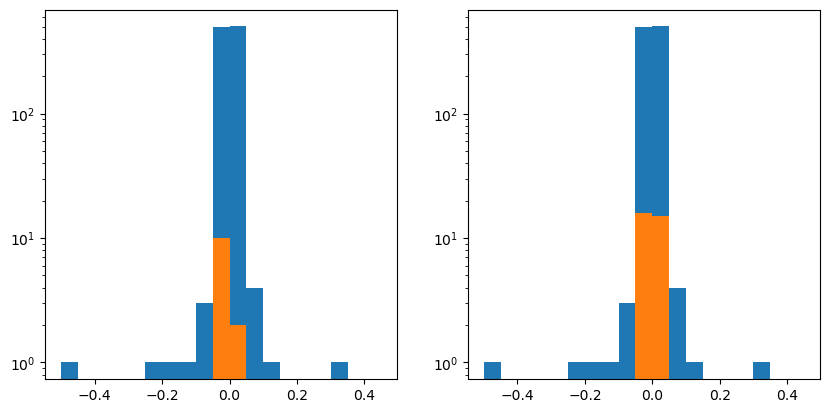

In [22]:
#99th percentile greatest deltas.
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].hist(asv_delta_ASVSOM["Delta Relative Abundance"], 
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[0].hist(asv_delta_ASVSOM.loc[(asv_delta_ASVSOM["MFT_strict"] == "CM"), "Delta Relative Abundance"],
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[1].hist(asv_delta_ASVSOM["Delta Relative Abundance"], 
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[1].hist(asv_delta_ASVSOM.loc[(asv_delta_ASVSOM["MFT_loose"] == "CM"), "Delta Relative Abundance"],
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
plt.show()

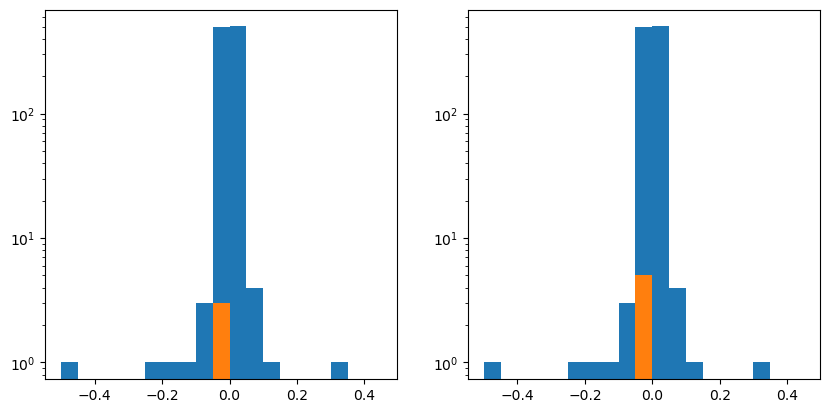

In [23]:
#99th percentile greatest deltas.
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].hist(asv_delta_ASVSOM["Delta Relative Abundance"], 
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[0].hist(asv_delta_ASVSOM.loc[(asv_delta_ASVSOM["MFT_strict"] == "GNCM"), "Delta Relative Abundance"],
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[1].hist(asv_delta_ASVSOM["Delta Relative Abundance"], 
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[1].hist(asv_delta_ASVSOM.loc[(asv_delta_ASVSOM["MFT_loose"] == "GNCM"), "Delta Relative Abundance"],
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
plt.show()

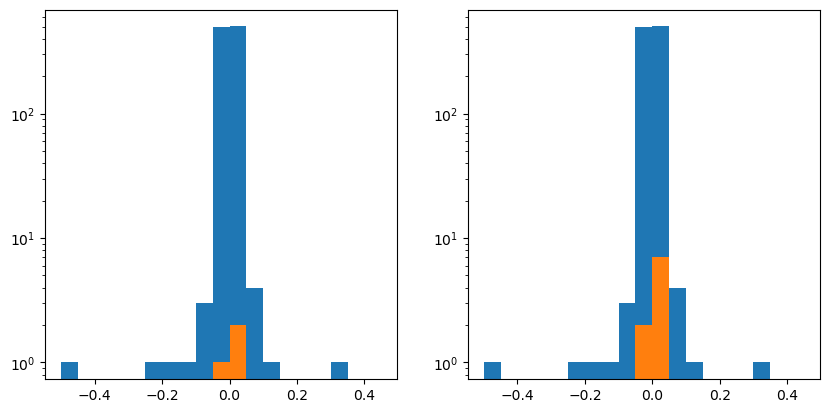

In [24]:
#99th percentile greatest deltas.
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].hist(asv_delta_ASVSOM["Delta Relative Abundance"], 
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[0].hist(asv_delta_ASVSOM.loc[(asv_delta_ASVSOM["MFT_strict"] == "eSNCM"), "Delta Relative Abundance"],
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[1].hist(asv_delta_ASVSOM["Delta Relative Abundance"], 
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
ax[1].hist(asv_delta_ASVSOM.loc[(asv_delta_ASVSOM["MFT_loose"] == "eSNCM"), "Delta Relative Abundance"],
         log = True, bins = np.arange(-0.5, 0.5, 0.05))
plt.show()

In [25]:
asv_delta_ASVSOM["MFT_loose"].unique()

array(['', 'eSNCM', 'GNCM', 'CM'], dtype=object)

### Conclusion: 

**none of the mixos' deltas are anything out of the ordinary**, no clear preference of nearshore or farshore clusters... I think this is more due to mixo frequencies being low across the board, it's just something this dataset is going to end up reproducing in any test.

**Assumption that match_by_genus will only add a few false negatives (not really mixos) seems unfounded.** Even at threshold = 5 (a species in the same genus as at least 5 mixotroph species is itself tagged as a mixotroph), this returns 45 matches compared to the strict species-match returning 18. That's 27 more matches, 1.5x the original. Although this may add a greater *number* of ASVs, their per-sample proportions may be low enough (for the false negatives, which I expect to be less common than the mixotrophs) that it won't impact an analysis relying on those.

---

## Part 2?

Check the water mass paper for useful supplementary tables. None. Still worth checking.